# Расчёт рамы с распределённой нагрузкой по предельным состояниям методом нелинейного программирования

frame_q.svg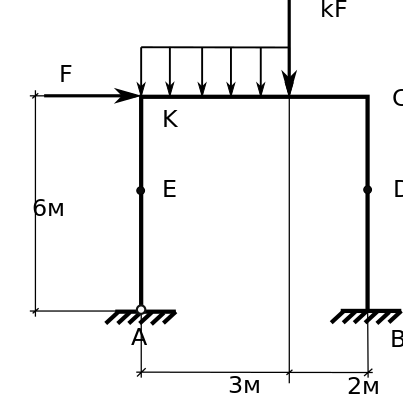

- Составим уравнения равновесия

(1) &nbsp; $\Sigma F_y = 0$; &nbsp; $ R_A + R_B - kF - q \cdot 3 = 0 $

(2) &nbsp; $\Sigma M_A = 0$; &nbsp; $ -R_B \cdot 5 + F \cdot 6 + kF \cdot 3 + q \cdot 3 \cdot 1.5 + M_B = 0 $

(3) &nbsp; $\Sigma M_B = 0$; &nbsp; $ R_A \cdot 5 + F \cdot 6 - kF \cdot 2 - q \cdot 3 \cdot 3.5 + M_B = 0 $

- неравенства для внутренних моментах в опасных сечениях

(правило знаков: слева + если по ходу часовой стрелки, справа + если против хода часовой стрелки)

(4) &nbsp; $ M_K^{лев} = - H_A \cdot 6$

(5) &nbsp; $ M_X^{лев} = - H_A \cdot 6 + R_A \cdot z - q \cdot z \cdot \frac{z}{2} $

*(z отсчитывается от точки K вправо)*

(6) &nbsp; $ M_W^{прав} = - R_B \cdot 2 - H_B \cdot 6 $

(7) &nbsp; $ M_C^{прав} = - H_A \cdot 6$

- ограничения для внутренних моментов
- Свяжем нагрузки

$ F = q \cdot 3 $

- Пронумеруем переменные:


0) $ R_A $

1) $ H_A $

2) $ R_B $

3) $ H_B $

4) $ M_K $

5) $ M_X $

6) $ M_W $

7) $ M_C $

8) $ M_B $

9) $ q $

10) $ z $



- Другие параметры
k =  2

In [1]:
# для запуска в mybinder.com:
# установка модулей
# убрать символ # в начале следующих строк и запустить ячейку
# !pip install numpy
# !pip install scipy
# !pip install seaborn

In [2]:
import numpy as np
from scipy.optimize import linprog, minimize
from matplotlib.pyplot import *  # для построения графиков

# выводить 4 знака после запятой, выводить маленькие (по модулю) числа как 0
# linewidth - максимальная ширина строки
np.set_printoptions(precision=2, suppress=True, linewidth=200)

In [3]:
# Сила q действует на участке от 0 до a
# силы F нет
# z используется как переменная

# параметры задачи
absM = 300    # kH*m;  предельный момент
absF = 100000  # kH
a = 2
l= 5

# 0  1  2  3   4    5  6  7  8     9  10
# Ra Ha Rb Hb  Mb   Mk Mx Mc Mb'   q  z
# Mb' - внутр. момент

# целевая функция
def opt_fun(x):
    return -x[9]

# ограничения записываются для вида
# выражение = 0
# где выражение - математическое выражение
# само выражение записывается после lambda x:

cons = []
cons += [ {'type':'eq', 'fun':lambda x: -x[1]*6 + x[0]*5 - x[9]*a*((l-a) + a/2) - x[3]*6 + x[4] } ]  # C
cons += [ {'type':'eq', 'fun':lambda x: -x[2]*5 + x[4]   + x[9]*a*a/2 } ]                  # A
cons += [ {'type':'eq', 'fun':lambda x:  x[0]*5 + x[4]   - x[9]*((l-a) + a/2)*a } ]                  # B

cons += [ {'type':'eq', 'fun':lambda x: -x[5] - x[1]*6 }]                                    # Mk l
cons += [ {'type':'eq', 'fun':lambda x: -x[6] + x[0]*x[10] - x[1]*6 - x[9]*x[10]*x[10]/2 }]  # Mx l
cons += [ {'type':'eq', 'fun':lambda x: -x[7] + x[3]*6 - x[4] } ]                            # Mc r
cons += [ {'type':'eq', 'fun':lambda x: -x[8] - x[4]} ]                                      # Mc r

# ограничения
bounds= [ [-absF,absF],[-absF,absF],[-absF,absF],[-absM,absM],               # Ra, Ha, Rb, Hb
          [-absM,absM],[-absM,absM],[-absM,absM],[-absM,absM],[-absM,absM],  # Mb, Mk, Mx, Mc, Mb'
          [-absF, absF], [0,a] ]                                             # q, z

# начальные значения
# если решение не получается, то стоит поменять начальные значения
# если решение получается, то всё равно нужно поменять начальную точку и убедится, 
# что решение не поменялось
x0 = [100] * 4 + [250] *5 + [200] + [1]


# [100] * 4 - повторить число 100 четыре раза

# поиск решения 
minimize(opt_fun, x0=x0, constraints=cons, bounds=bounds, method='SLSQP')

     fun: -499.99999999797967
     jac: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 156
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([ 800.,   50.,  200.,  -50.,   -0., -300.,  300., -300.,    0.,  500.,    2.])

**Контроль корректности решения**

- `message: 'Optimization terminated successfully.'`

- `success: True`

- Пластические шарниры образовались

- Силы не вышли за предел записанный в absF

- Полученная схема образования пластических шарниров возможна: шарниры в т. С, X, K (балочный механизм разрушения)



**Ответ**

...

In [4]:
# 1-Ra 2-Ha 3-Rb 4-Hb   
# 5-Mk 6-Mx 7-Mw 8-Mc 9-Mb
# 10-q 11-z

In [5]:
# Сила q действует на участке от 0 до a
# силы F нет
# z вычисляется

# параметры задачи
absM = 300    # kH*m;  предельный момент
absF = 100000  # kH
a = 2
l= 5

# 0  1  2  3   4    5  6  7  8     9  10
# Ra Ha Rb Hb  Mb   Mk Mx Mc Mb'   q  z
# Mb' - внутр. момент

# целевая функция
def opt_fun(x):
    return -x[9]

# ограничения записываются для вида
# выражение = 0
# где выражение - математическое выражение
# само выражение записывается после lambda x:

cons = []
cons += [ {'type':'eq', 'fun':lambda x: -x[1]*6 + x[0]*5 - x[9]*a*((l-a) + a/2) - x[3]*6 + x[4] } ]  # C
cons += [ {'type':'eq', 'fun':lambda x: -x[2]*5 + x[4]   + x[9]*a*a/2 } ]                  # A
cons += [ {'type':'eq', 'fun':lambda x:  x[0]*5 + x[4]   - x[9]*((l-a) + a/2)*a } ]                  # B

cons += [ {'type':'eq', 'fun':lambda x: -x[5] - x[1]*6 }]                                    # Mk l
cons += [ {'type':'eq', 'fun':lambda x: -x[6] + x[0]*x[10] - x[1]*6 - x[9]*x[10]*x[10]/2 }]  # Mx l
cons += [ {'type':'eq', 'fun':lambda x: -x[7] + x[3]*6 - x[4] } ]                            # Mc r
cons += [ {'type':'eq', 'fun':lambda x: -x[8] - x[4]} ]                                      # Mc r
cons += [ {'type':'eq', 'fun':lambda x: -x[10] + x[0]/x[9] } ]

# ограничения
bounds= [ [-absF,absF],[-absF,absF],[-absF,absF],[-absM,absM],               # Ra, Ha, Rb, Hb
          [-absM,absM],[-absM,absM],[-absM,absM],[-absM,absM],[-absM,absM],  # Mb, Mk, Mx, Mc, Mb'
          [-absF, absF], [0,a] ]                                             # q, z

# начальные значения
# если решение не получается, то стоит поменять начальные значения
# если решение получается, то всё равно нужно поменять начальную точку и убедится, 
# что решение не поменялось
x0 = [100] * 4 + [250] *5 + [200] + [a/2]

# поиск решения 
minimize(opt_fun, x0=x0, constraints=cons, bounds=bounds, method='SLSQP')

     fun: -468.7500000017674
     jac: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 260
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([ 750.  ,   50.  ,  187.5 ,  -50.  ,   -0.  , -300.  ,  300.  , -300.  ,    0.  ,  468.75,    1.6 ])

In [6]:
# 0  1  2  3   4    5  6  7  8     9  10
# Ra Ha Rb Hb  Mb   Mk Mx Mc Mb'   q  z

file:///home/s/w/prep/%D0%9D%D0%B5%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B5%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B%20%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BC%D0%B5%D1%85%D0%B0%D0%BD%D0%B8%D0%BA%D0%B8/public/examples/beam_q-1_equations.png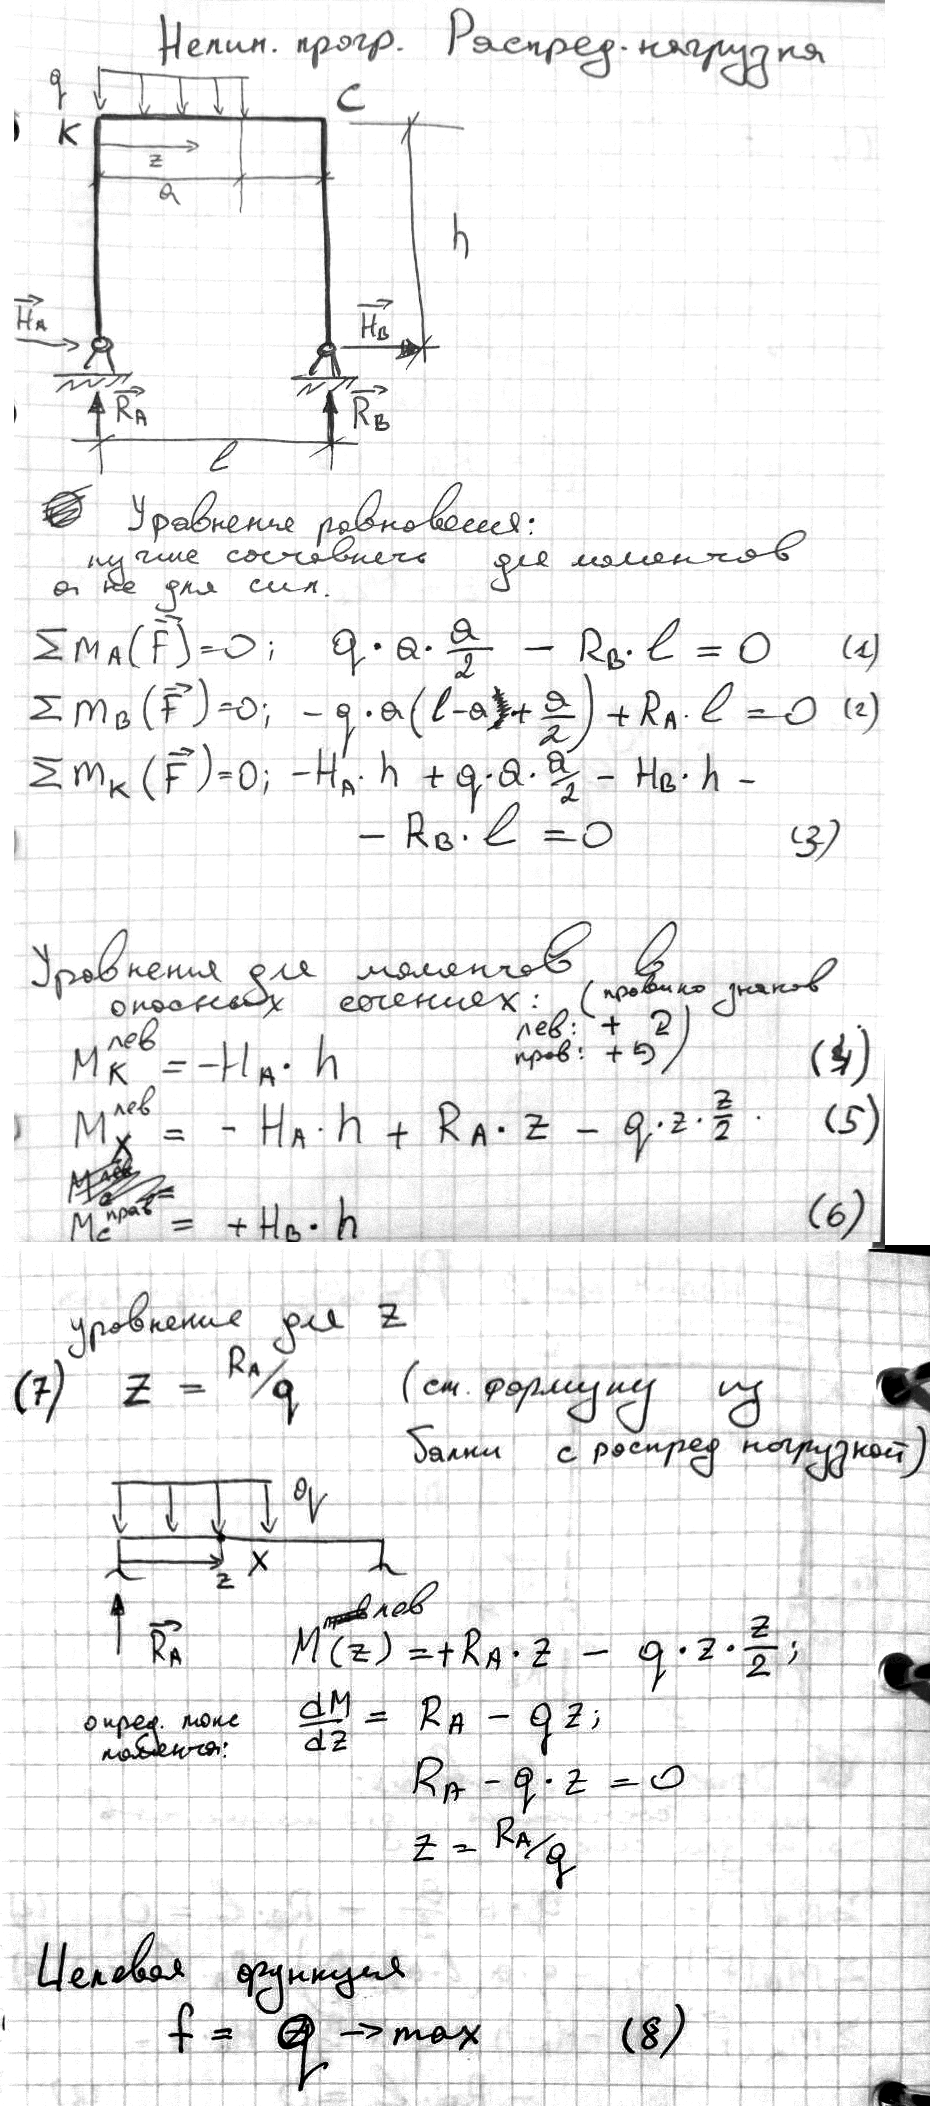

In [55]:
# Сила q действует на участке от 0 до a
# силы F нет
# z вычисляется
# в т B шарнир.

# параметры задачи
absM = 300    # kH*m;  предельный момент
absF = 100000  # kH
a = 2
l = 5
h = 6

# 0  1  2  3     4  5  6   7  8
# Ra Ha Rb Hb    Mk Mx Mc  q  z
# Mb' - внутр. момент

# целевая функция
def opt_fun(x):
    return -x[7]

# ограничения записываются для вида
# выражение = 0
# где выражение - математическое выражение
# само выражение записывается после lambda x:

cons = []
cons += [ {'type':'eq', 'fun':lambda x: -x[2]*l + x[7]*a*a/2 } ]                  # A
cons += [ {'type':'eq', 'fun':lambda x:  x[0]*l - x[7]*((l-a) + a/2)*a } ]                  # B
cons += [ {'type':'eq', 'fun':lambda x: -x[1]*h + x[7]*a*a/2 - x[3]*h - x[2]*l } ]

cons += [ {'type':'eq', 'fun':lambda x: -x[4] - x[1]*h }]                                    # Mk l
cons += [ {'type':'eq', 'fun':lambda x: -x[5] + x[0]*x[8] - x[1]*h - x[7]*x[8]*x[8]/2 }]     # Mx l
cons += [ {'type':'eq', 'fun':lambda x: -x[6] + x[3]*h} ]                            # Mc r
cons += [ {'type':'eq', 'fun':lambda x: -x[8] + x[0]/x[7] } ]                               # z

# ограничения
bounds= [ [-absF,absF],[-absF,absF],[-absF,absF],[-absM,absM],               # Ra, Ha, Rb, Hb
          [-absM,absM],[-absM,absM],[-absM,absM],                            # Mk, Mx, Mc,
          [-absF, absF], [0,a] ]                                             # q, z

# начальные значения
# если решение не получается, то стоит поменять начальные значения
# если решение получается, то всё равно нужно поменять начальную точку и убедится, 
# что решение не поменялось
x0 = [100] * 4 + [250] *3 + [200] + [a/2]

# поиск решения 
minimize(opt_fun, x0=x0, constraints=cons, bounds=bounds, method='SLSQP')

     fun: -468.7499999881654
     jac: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 154
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([ 750.  ,   50.  ,  187.5 ,  -50.  , -300.  ,  300.  , -300.  ,  468.75,    1.6 ])

In [95]:
# то же самое что и выше, только в левой точке (W) где действует q добавлена сила F
# q и F независимы
# с одинаковыми коэф в целевой функции
# точки X (пластический шарнир под действием q) и W совпадают23332444444444444444

absM = 300    # kH*m;  предельный момент
absF = 100000  # kH
a = 2
l = 5
h = 6

# 0  1  2  3     4  5  6  7   8  9  10
# Ra Ha Rb Hb    Mk Mx Mw Mc  q  F  z
# Mb' - внутр. момент

# целевая функция
def opt_fun(x):
    return -x[8] -x[9]

# ограничения записываются для вида
# выражение = 0
# где выражение - математическое выражение
# само выражение записывается после lambda x:

cons = []
cons += [ {'type':'eq', 'fun':lambda x: -x[2]*l + x[8]*a*a/2 + x[9]*a } ]                       # A (1)
cons += [ {'type':'eq', 'fun':lambda x:  x[0]*l - x[8]*(l-a + a/2)*a - x[9]*(l-a) } ]           # B (2)
cons += [ {'type':'eq', 'fun':lambda x: -x[1]*h + x[8]*a*a/2 - x[3]*h - x[2]*l + x[9]*a } ]     # K (3)

cons += [ {'type':'eq', 'fun':lambda x: -x[4] - x[1]*h }]                                       # Mk l  (4)
cons += [ {'type':'eq', 'fun':lambda x: -x[5] + x[0]*x[10] - x[1]*h - x[8]*x[10]*x[10]/2 }]     # Mx l  (5)
# cons += [ {'type':'eq', 'fun':lambda x: -x[5] - x[8]*(a - x[10])**2/2 - x[9]*(a - x[10]) + 
#            x[2]* (l - a + (a - x[10])/2) + x[3]*h }]                                        # Mx r  (5)

# cons += [ {'type':'eq', 'fun':lambda x: -x[6] + x[3]*h + x[2]*(l-a)} ]                          # Mw r  (6)
cons += [ {'type':'eq', 'fun':lambda x: -x[6] + x[0]*a - x[1]*h - x[8]*a**2/2 } ]               # Mw l  (6)

cons += [ {'type':'eq', 'fun':lambda x: -x[7] + x[3]*h} ]                                       # Mc r  (7)

cons += [ {'type':'eq', 'fun':lambda x: -x[10] + x[0]/x[8] } ]                                  # z     (8)
# cons += [ {'type':'eq', 'fun':lambda x: -x[8] + x[9]/a } ]                                  # q = F/a     (8)

# ограничения
bounds= [ [-absF,absF],[-absF,absF],[-absF,absF],[-absM,absM],               # Ra, Ha, Rb, Hb
          [-absM,absM],[-absM,absM],[-absM,absM],[-absM,absM],                           # Mk, Mx, Mw, Mc,
          [0, absF], [0, absF], [0,a] ]                                             # q, F, z

# начальные значения
# если решение не получается, то стоит поменять начальные значения
# если решение получается, то всё равно нужно поменять начальную точку и убедится, 
# что решение не поменялось
x0 = [100] * 4 + [250] *4 + [200]*2 + [a/2]

# поиск решения 
minimize(opt_fun, x0=x0, constraints=cons, bounds=bounds, method='SLSQP')

     fun: -499.99999998126077
     jac: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 247
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([ 600.,   50.,  200.,  -50., -300.,  300.,  300., -300.,  300.,  200.,    2.])

In [ ]:
# 0  1  2  3     4  5  6  7     8  9  10
# Ra Ha Rb Hb    Mk Mx Mw Mc    q  F  z

In [95]:
# то же самое что и выше, только в левой точке (W) где действует q добавлена сила F

absM = 300    # kH*m;  предельный момент
absF = 100000  # kH
a = 2
l = 5
h = 6

# 0  1  2  3     4  5  6  7   8  9  10
# Ra Ha Rb Hb    Mk Mx Mw Mc  q  F  z
# Mb' - внутр. момент

# целевая функция
def opt_fun(x):
    return -x[8] -x[9]

# ограничения записываются для вида
# выражение = 0
# где выражение - математическое выражение
# само выражение записывается после lambda x:

cons = []
cons += [ {'type':'eq', 'fun':lambda x: -x[2]*l + x[8]*a*a/2 + x[9]*a } ]                       # A (1)
cons += [ {'type':'eq', 'fun':lambda x:  x[0]*l - x[8]*(l-a + a/2)*a - x[9]*(l-a) } ]           # B (2)
cons += [ {'type':'eq', 'fun':lambda x: -x[1]*h + x[8]*a*a/2 - x[3]*h - x[2]*l + x[9]*a } ]     # K (3)

cons += [ {'type':'eq', 'fun':lambda x: -x[4] - x[1]*h }]                                       # Mk l  (4)
cons += [ {'type':'eq', 'fun':lambda x: -x[5] + x[0]*x[10] - x[1]*h - x[8]*x[10]*x[10]/2 }]     # Mx l  (5)
# cons += [ {'type':'eq', 'fun':lambda x: -x[5] - x[8]*(a - x[10])**2/2 - x[9]*(a - x[10]) + 
#            x[2]* (l - a + (a - x[10])/2) + x[3]*h }]                                        # Mx r  (5)

# cons += [ {'type':'eq', 'fun':lambda x: -x[6] + x[3]*h + x[2]*(l-a)} ]                          # Mw r  (6)
cons += [ {'type':'eq', 'fun':lambda x: -x[6] + x[0]*a - x[1]*h - x[8]*a**2/2 } ]               # Mw l  (6)

cons += [ {'type':'eq', 'fun':lambda x: -x[7] + x[3]*h} ]                                       # Mc r  (7)

cons += [ {'type':'eq', 'fun':lambda x: -x[10] + x[0]/x[8] } ]                                  # z     (8)
# cons += [ {'type':'eq', 'fun':lambda x: -x[8] + x[9]/a } ]                                  # q = F/a     (8)

# ограничения
bounds= [ [-absF,absF],[-absF,absF],[-absF,absF],[-absM,absM],               # Ra, Ha, Rb, Hb
          [-absM,absM],[-absM,absM],[-absM,absM],[-absM,absM],                           # Mk, Mx, Mw, Mc,
          [0, absF], [0, absF], [0,a] ]                                             # q, F, z

# начальные значения
# если решение не получается, то стоит поменять начальные значения
# если решение получается, то всё равно нужно поменять начальную точку и убедится, 
# что решение не поменялось
x0 = [100] * 4 + [250] *4 + [200]*2 + [a/2]

# поиск решения 
minimize(opt_fun, x0=x0, constraints=cons, bounds=bounds, method='SLSQP')

     fun: -499.99999998126077
     jac: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 247
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([ 600.,   50.,  200.,  -50., -300.,  300.,  300., -300.,  300.,  200.,    2.])